In [1]:
%matplotlib inline

Reading a `GeoDataFrame` from a `shapefile`
-------------------------------------------------------------------------

First, lets define some imports:

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

We use the `shapefile` set ``states_21basic`` to map the US States and get their geometries. Lets load the data into a ``GeoDataFrame``:

In [3]:
usa = geopandas.read_file("states_21basic/states.shp")

Check out the ``head`` of the `DataFrame`:

In [4]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


The geometry column contains POLYGON shapes! These polygons are a tuple of longitude/latitude points that make up the border of each US state. We’ve already got enough info to make a basic plot:

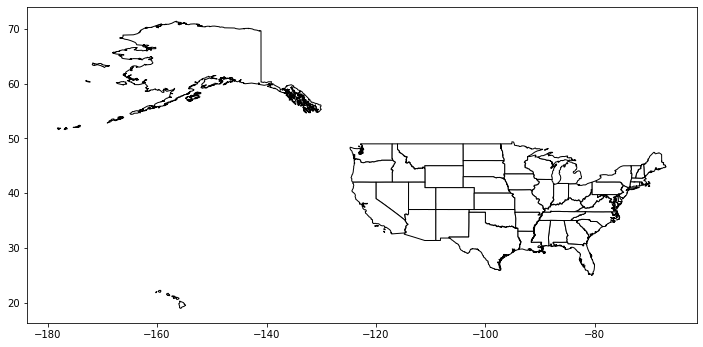

In [5]:
usa.plot(color='white', edgecolor='black')

You can check out individual states:

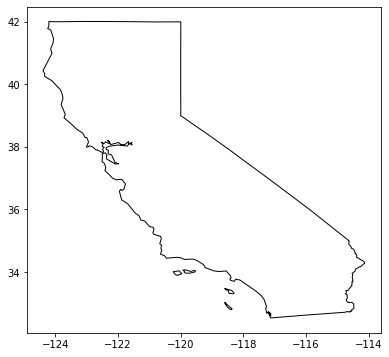

In [6]:
usa[usa.STATE_ABBR == 'CA'].plot(color='white', edgecolor='black')

Creating a GeoDataFrame from a DataFrame with coordinates
-------------------------------------------------------------------------

Create a ``GeoDataFrame`` when starting from a *regular* ``DataFrame`` that has coordinates in WKT format.

A ``GeoDataFrame`` needs a ``shapely`` object:

In [7]:
from shapely import wkt

We use the `geo_sparql_query` module to retrieve the `DataFrame` instance holding collection of WKT we would like to plot.

In [8]:
from geo_sparql_query import get_local_gid_df, get_osm_df

Set the GID (Global Identifier) of the segment you would like to inspect (an identifer of a specific segment in our knowledge graph, accessed using a `SPARQL` query behind the scenes).

__Note:__
_Please make sure that the `SPARQL` endpoint of your linked-maps-style knowledge graph is active. You can run the following command to initiate the triplestore (and the `SPARQL` endpoint) from `apache-jena-fuseki`'s root directory like this: <br />
`./fuseki-server --file /linked-maps/bray_data/bray.linked_maps.ttl /linkedmaps`_

In [9]:
INSPECTED_GID = 75

Retrieve the `DataFrame`:

In [10]:
wkt_df = get_local_gid_df(INSPECTED_GID)

We use ``shapely.wkt`` sub-module to parse wkt format:

In [11]:
wkt_df['Coordinates'] = wkt_df['Coordinates'].apply(wkt.loads)

Lets inspect the ``GeoDataFrame``:

In [12]:
gdf = geopandas.GeoDataFrame(wkt_df, geometry='Coordinates')
gdf.insert(0, 'OSM', 0)

gdf.head()

,OSM,GID,Instance,Coordinates,Label,Types
0,0,http://linkedmaps.isi.edu/75,None,"MULTILINESTRING ((-121.99552 41.72220, -121.99...",None,None


We can plot our ``GeoDataFrame`` on top of a state (which we parsed from the `shapefile`):

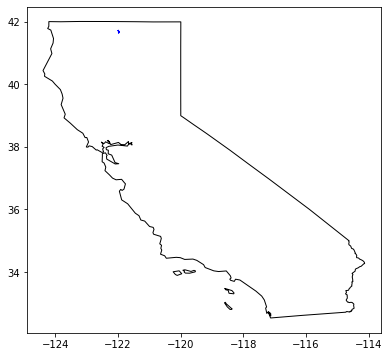

In [34]:
ax = usa[usa.STATE_ABBR == 'CA'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='blue')

Or as a standalone (no state borders):

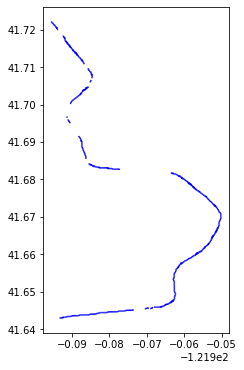

In [35]:
gdf.plot(color='blue')

Now, lets retrieve the `DataFrame` instance holding the collection of WKT literals that correspond to our data in LinkedGeoData Knowledge Base (also accessed using a `SPARQL` query behind the scenes):

In [15]:
osm_df = get_osm_df(INSPECTED_GID)

Lets do simple manipulations to convert our `DataFrame` to `GeoDataFrame` and allow us to show plots of both frames in the same plot (by inserting an additional column):

In [16]:
osm_df['Coordinates'] = osm_df['Coordinates'].apply(wkt.loads)
osm_gdf = geopandas.GeoDataFrame(osm_df, geometry='Coordinates')
osm_gdf.insert(0, 'OSM', 1)

Lets inspect the `GeoDataFrame` and plot it:

In [17]:
osm_gdf.head()

,OSM,GID,Instance,Coordinates,Label,Types
0,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way10670872,"LINESTRING (-121.96900 41.64549, -121.96962 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...
1,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way249503576,"LINESTRING (-121.98591 41.68717, -121.98566 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...
2,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way322131253,"LINESTRING (-121.96628 41.68364, -121.96442 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...
3,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way249503577,"LINESTRING (-121.99814 41.72568, -121.99032 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...


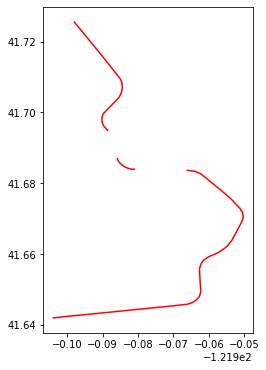

In [36]:
osm_gdf.plot(color='red')

Lets concat both `GeoDataFrame`s to plot them together:

In [37]:
frames = [gdf, osm_gdf]
result = pd.concat(frames)
result

,OSM,GID,Instance,Coordinates,Label,Types
0,0,http://linkedmaps.isi.edu/75,None,"MULTILINESTRING ((-121.99552 41.72220, -121.99...",None,None
0,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way10670872,"LINESTRING (-121.96900 41.64549, -121.96962 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...
1,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way249503576,"LINESTRING (-121.98591 41.68717, -121.98566 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...
2,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way322131253,"LINESTRING (-121.96628 41.68364, -121.96442 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...
3,1,http://linkedmaps.isi.edu/75,http://linkedgeodata.org/triplify/way249503577,"LINESTRING (-121.99814 41.72568, -121.99032 41...",Black Butte Subdivision,http://geovocab.org/spatial#Feature http://lin...


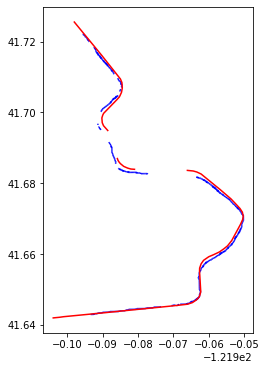

In [38]:
result.plot(column='OSM', cmap='bwr')

We can add a basemap:

In [ ]:
#TODO: fix
#import contextily as ctx

#result.crs = {'init' :'epsg:4326'}  
#ax = result.to_crs(epsg=3857).plot(column='OSM', cmap='bwr')
#ctx.add_basemap(ax)

We can also export our table data to an excel file:

In [ ]:
osm_gdf.to_excel("geolinking_results_g.xlsx") 

And we can plot each 'distant' instance (from LinkedGeoData) separately (each time with our `INSPECTED_GID`):

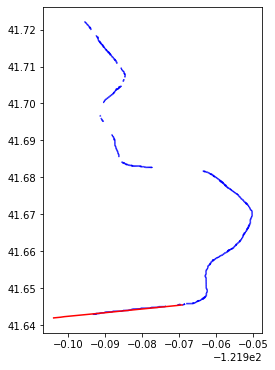

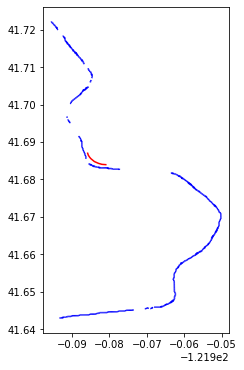

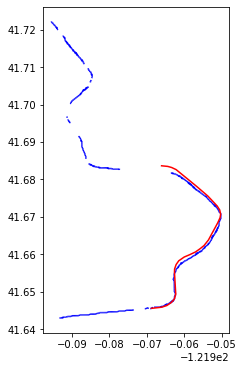

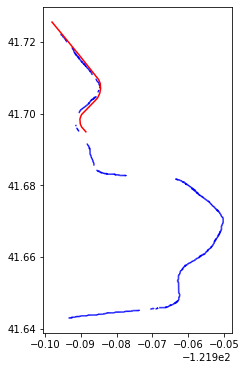

In [39]:
for idx in range(len(osm_gdf.index)):
    osm_inst_uri = osm_gdf.iloc[idx]['Instance']
    sub_osm_gdf = osm_gdf[osm_gdf.Instance == osm_inst_uri]
    frames = [gdf, sub_osm_gdf]
    result = pd.concat(frames)
    #print(sub_osm_gdf.iloc[0]['Types'])
    result.plot(column='OSM', cmap='bwr')

Writing a `shapefile` from a `GeoDataFrame`
-------------------------------------------------------------------------

First let define some `WKT` coordinates and insert them into a `GeoDataFrame`

In [40]:
MDR_ARTIFICIAL_DATA = ['LINESTRING (-118.44259500278235 33.98456150282233,-118.43306779636146 33.975842755729126,-118.428304193151 33.98196376558386)',
                       'LINESTRING(-118.41718911899329 33.99580558664377,-118.43306779636146 33.975842755729126,-118.42637300266028 33.966055341841916)',
                       'LINESTRING(-118.44877481235267 33.957939831868956,-118.43306779636146 33.975842755729126,-118.41367006076575 33.95366819986043)',
                       'LINESTRING(-118.44087838901282 33.96676719174423,-118.43315362704993 33.975771578603826,-118.45212220920325 33.994382367142336,-118.44508409274817 33.998865427838126)']

In [63]:
AD_IDX = 3 #0-3

In [64]:
mdr_df = pd.DataFrame(columns=['GID', 'Instance', 'Coordinates', 'Label', 'Types'])
mdr_df = mdr_df.append({'GID': 'http://linkedmaps.isi.edu/TEST1',
                        'Instance': None,
                        'Coordinates': MDR_ARTIFICIAL_DATA[AD_IDX], 
                        'Label': None,'Types': None}, ignore_index=True)

We use ``shapely.wkt`` sub-module to parse wkt format:

In [65]:
mdr_df['Coordinates'] = mdr_df['Coordinates'].apply(wkt.loads)

Lets inspect the resulting ``GeoDataFrame`` and plot it:

In [66]:
mdr_gdf = geopandas.GeoDataFrame(mdr_df, geometry='Coordinates')
mdr_gdf.head()

,GID,Instance,Coordinates,Label,Types
0,http://linkedmaps.isi.edu/TEST1,None,"LINESTRING (-118.44088 33.96677, -118.43315 33...",None,None


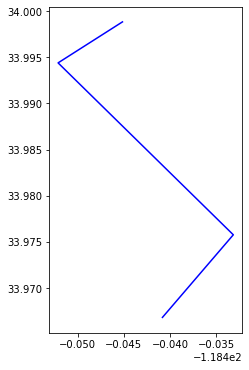

In [67]:
mdr_gdf.plot(color='blue')

set the CRS (Coordinate Reference System):

In [68]:
mdr_gdf.crs = {'init' :'epsg:4326'} 

/opt/anaconda3/envs/geop/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Now lets write it to a `shapefile`:

In [69]:
mdr_gdf.to_file(driver = 'ESRI Shapefile', filename= "maps_artificial_data/190%d.shp" % (AD_IDX))

## Wetlands

In [22]:
WETLANDS_ARTIFICIAL_DATA = ['MULTIPOLYGON(((-118.43221430662653 33.974750621695854,-118.42835192564509 33.96841554284218,-118.42676405790827 33.966244424092956,-118.42599158171198 33.96563934833677,-118.42672114256403 33.965390198244855,-118.42762236479304 33.965390198244855,-118.4307122695782 33.967241010072414,-118.43436007383845 33.96517664044232,-118.43487505796931 33.965924090405295,-118.43629126432917 33.96521223344663,-118.43723540190241 33.96503426827608,-118.43809370878718 33.96556816267069,-118.43959574583552 33.9640732499206,-118.44152693632624 33.962685093127206,-118.4411406982281 33.96240034021569,-118.44187025908015 33.96215118063615,-118.4425998199322 33.96225796340245,-118.44448809507868 33.96151048122341,-118.44526057127497 33.96197320906111,-118.4478784072735 33.96001549716106,-118.44822173002741 33.96022906792132,-118.44847922209284 33.95997990198222,-118.45032458189509 33.962756281206154,-118.45105414274714 33.96393087590745,-118.4431577194073 33.96845113449108,-118.43221430662653 33.974750621695854)))',
                            'MULTIPOLYGON(((-118.43221430662653 33.974750621695854,-118.42835192564509 33.96841554284218,-118.4307122695782 33.967241010072414,-118.43436007383845 33.96517664044232,-118.43487505796931 33.965924090405295,-118.43629126432917 33.96521223344663,-118.43723540190241 33.96503426827608,-118.43809370878718 33.96556816267069,-118.43959574583552 33.9640732499206,-118.44152693632624 33.962685093127206,-118.4411406982281 33.96240034021569,-118.44187025908015 33.96215118063615,-118.4425998199322 33.96225796340245,-118.44448809507868 33.96151048122341,-118.44526057127497 33.96197320906111,-118.4478784072735 33.96001549716106,-118.44822173002741 33.96022906792132,-118.44847922209284 33.95997990198222,-118.45032458189509 33.962756281206154,-118.45105414274714 33.96393087590745,-118.4431577194073 33.96845113449108,-118.43221430662653 33.974750621695854)))',
                            'MULTIPOLYGON(((-118.43221430662653 33.974750621695854,-118.42835192564509 33.96841554284218,-118.4307122695782 33.967241010072414,-118.43436007383845 33.96517664044232,-118.43487505796931 33.965924090405295,-118.43629126432917 33.96521223344663,-118.43723540190241 33.96503426827608,-118.43809370878718 33.96556816267069,-118.43959574583552 33.9640732499206,-118.44152693632624 33.962685093127206,-118.4411406982281 33.96240034021569,-118.44187025908015 33.96215118063615,-118.4425998199322 33.96225796340245,-118.44448809507868 33.96151048122341,-118.44526057127497 33.96197320906111,-118.4478784072735 33.96001549716106,-118.44822173002741 33.96022906792132,-118.44847922209284 33.95997990198222,-118.45032458189509 33.962756281206154,-118.4431577194073 33.96845113449108,-118.43221430662653 33.974750621695854)))']


In [31]:
AD_IDX = 2

In [32]:
wt_df = pd.DataFrame(columns=['GID', 'Instance', 'Coordinates', 'Label', 'Types'])
wt_df = wt_df.append({'GID': 'http://linkedmaps.isi.edu/TEST1',
                      'Instance': None,
                      'Coordinates': WETLANDS_ARTIFICIAL_DATA[AD_IDX],
                      'Label': None,'Types': None}, ignore_index=True)

In [33]:
wt_df.head()

,GID,Instance,Coordinates,Label,Types
0,http://linkedmaps.isi.edu/TEST1,None,MULTIPOLYGON(((-118.43221430662653 33.97475062...,None,None


In [34]:
wt_df['Coordinates'] = wt_df['Coordinates'].apply(wkt.loads)
wt_df = geopandas.GeoDataFrame(wt_df, geometry='Coordinates')
wt_df.insert(0, 'OSM', AD_IDX)
if AD_IDX == 0:
    frames = [wt_df]
else:
    frames = [wt_final, wt_df]
wt_final = pd.concat(frames)

In [35]:
wt_final.head()

,OSM,GID,Instance,Coordinates,Label,Types
0,0,http://linkedmaps.isi.edu/TEST1,None,"MULTIPOLYGON (((-118.43221 33.97475, -118.4283...",None,None
0,1,http://linkedmaps.isi.edu/TEST1,None,"MULTIPOLYGON (((-118.43221 33.97475, -118.4283...",None,None
0,2,http://linkedmaps.isi.edu/TEST1,None,"MULTIPOLYGON (((-118.43221 33.97475, -118.4283...",None,None


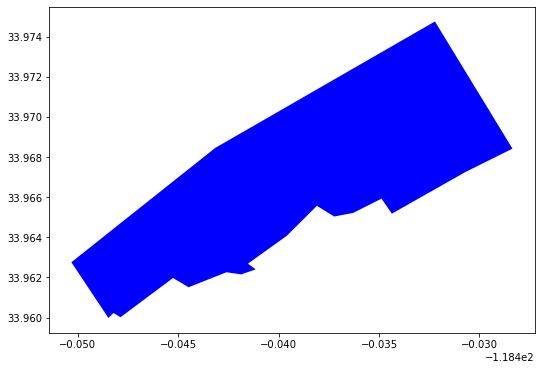

In [36]:
wt_df.plot(color='blue')

In [37]:
wt_df.to_file(driver = 'ESRI Shapefile', filename= "wetlands_artificial_data/190%d.shp" % (AD_IDX))

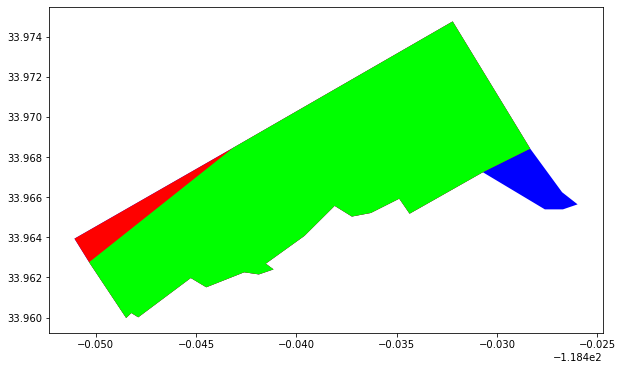

In [38]:
wt_final.plot(column='OSM', cmap='brg')